# Analysis of the different BoostDM scores

## 1. prepare the matrix

In [1]:
import pandas as pd
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 40)
%precision 2

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
### Read data ch mutations and age (NOT PROVIDED)
# Created in section 1_Post_processing_calling
patient_age_ch = pd.read_csv('../1_Post_processing_calling/patient_450k_age_670124_ALL_MUTATIONS_20230802_v3.txt.gz',sep="\t")
print(f'Patients:{len(patient_age_ch)}')
print(f'Columns:{list(patient_age_ch.columns)}')

Patients:469880
Columns:['patient', 'age_recruitment', 'age_group', 'CH_driver', 'CH_driver_big', 'CH_driver_small', 'CH_potential', 'CH_passengers', 'num_CH_drivers', 'CH_driver_multiple', 'num_CH_potential', 'ASXL1_driver', 'ASXL1_passenger', 'ASXL1_potential', 'CHEK2_driver', 'CHEK2_passenger', 'CHEK2_potential', 'DNMT3A_driver', 'DNMT3A_passenger', 'DNMT3A_potential', 'GNAS_driver', 'GNAS_passenger', 'GNAS_potential', 'IDH2_driver', 'IDH2_passenger', 'IDH2_potential', 'MDM4_driver', 'MDM4_passenger', 'MDM4_potential', 'PPM1D_driver', 'PPM1D_passenger', 'PPM1D_potential', 'SF3B1_driver', 'SF3B1_passenger', 'SF3B1_potential', 'SRSF2_driver', 'SRSF2_passenger', 'SRSF2_potential', 'TET2_driver', 'TET2_passenger', 'TET2_potential', 'TP53_driver', 'TP53_passenger', 'TP53_potential', 'U2AF1_driver', 'U2AF1_passenger', 'U2AF1_potential', 'chromatin_gene_driver', 'DDR_gene_driver', 'splicing_gene_driver', 'chromatin_gene_passenger', 'DDR_gene_passenger', 'splicing_gene_passenger', 'chromati

In [3]:
### Upload general cancer information per case (NOT PROVIDED)
# Created in section 0_Clinical_phenotypes
patient_cancer = pd.read_csv('../../../Paper_data/UKB_clinic_info/cancer_ukb450k_670124.txt.gz', sep="\t")
ukb200K_ch_cancer = pd.merge(patient_age_ch, patient_cancer,  how='inner', on='patient')
ukb200K_ch_cancer.columns

/tmp/jobs/jramis/9874679/ipykernel_54315/1174477373.py:3: DtypeWarning: Columns (36,37,38,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_cancer = pd.read_csv('../../../Paper_data/UKB_clinic_info/cancer_ukb450k_670124.txt.gz', sep="\t")


Index(['patient', 'age_recruitment_x', 'age_group_x', 'CH_driver',
       'CH_driver_big', 'CH_driver_small', 'CH_potential', 'CH_passengers',
       'num_CH_drivers', 'CH_driver_multiple',
       ...
       '22009-0.1', '22009-0.2', '22009-0.3', '22009-0.4', '22009-0.5',
       '22009-0.6', '22009-0.7', '22009-0.8', '22009-0.9', '22009-0.10'],
      dtype='object', length=139)

In [4]:
# Upload Cancer variables per case (NOT PROVIDED)
# Created in section 0_Clinical_phenotypes
patient_cancer = pd.read_csv('../../../Paper_data/UKB_clinic_info/cancer_ukb200k_Siddharta_670124_simple.txt.gz', sep="\t")
patient_cancer = patient_cancer.rename(columns={'eid': 'patient'})
ukb200K_ch_cancer = pd.merge(ukb200K_ch_cancer, patient_cancer,  how='inner', on='patient')
ukb200K_ch_cancer.rename(columns={'CH_passengers':'CH_nonDriver'}, inplace=True)
ukb200K_ch_cancer.columns

Index(['patient', 'age_recruitment_x', 'age_group_x', 'CH_driver',
       'CH_driver_big', 'CH_driver_small', 'CH_potential', 'CH_nonDriver',
       'num_CH_drivers', 'CH_driver_multiple',
       ...
       'var_Cervical_post', 'var_Cervical_pre', 'var_Sarcoma_years',
       'var_Sarcoma_var', 'var_Sarcoma_post', 'var_Sarcoma_pre',
       'var_Testicular_years', 'var_Testicular_var', 'var_Testicular_post',
       'var_Testicular_pre'],
      dtype='object', length=263)

In [5]:
# Create a unique variable for hematological cancer
yeears = ['var_MM_years', 'var_MPN_years', 'var_MDS_years', 'var_CMML_years',
          'var_AML_years', 'var_LL_years', 'var_Lymphoma_years', 'var_Myeloma_years']
ukb200K_ch_cancer['var_HNALL_years'] = ukb200K_ch_cancer.loc[:,yeears].min(axis=1)
ukb200K_ch_cancer['var_HNALL_var'] = np.where(ukb200K_ch_cancer['var_HNALL_years'].notnull(), 1, 0)
ukb200K_ch_cancer['var_HNALL_post'] = np.where(ukb200K_ch_cancer['var_HNALL_years'] > 0, 1, 0)
ukb200K_ch_cancer['var_HNALL_pre'] = np.where(ukb200K_ch_cancer['var_HNALL_years'] < 0, 1, 0)

In [6]:
ukb200K_ch_cancer = ukb200K_ch_cancer.rename(columns = {'31-0.0':'sex',
                                                                          '22009-0.1':'PC1',
                                                                          '22009-0.2':'PC2',
                                                                          '22009-0.3':'PC3',
                                                                          '22009-0.4':'PC4',
                                                                          '22009-0.5':'PC5',
                                                                          '22009-0.6':'PC6',
                                                                          '22009-0.7':'PC7',
                                                                          '22009-0.8':'PC8',
                                                                          '22009-0.9':'PC9',
                                                                          '22009-0.10':'PC10',
                                                                         })
ukb200K_ch_cancer

,patient,age_recruitment_x,age_group_x,CH_driver,CH_driver_big,CH_driver_small,CH_potential,CH_nonDriver,num_CH_drivers,CH_driver_multiple,num_CH_potential,ASXL1_driver,ASXL1_passenger,ASXL1_potential,CHEK2_driver,CHEK2_passenger,CHEK2_potential,DNMT3A_driver,DNMT3A_passenger,DNMT3A_potential,GNAS_driver,GNAS_passenger,GNAS_potential,IDH2_driver,IDH2_passenger,IDH2_potential,MDM4_driver,MDM4_passenger,MDM4_potential,PPM1D_driver,PPM1D_passenger,PPM1D_potential,SF3B1_driver,SF3B1_passenger,SF3B1_potential,SRSF2_driver,SRSF2_passenger,SRSF2_potential,TET2_driver,TET2_passenger,TET2_potential,TP53_driver,TP53_passenger,TP53_potential,U2AF1_driver,U2AF1_passenger,U2AF1_potential,chromatin_gene_driver,DDR_gene_driver,splicing_gene_driver,chromatin_gene_passenger,DDR_gene_passenger,splicing_gene_passenger,chromatin_gene_potential,DDR_gene_potential,splicing_gene_potential,age_recruitment_y,age_group_y,eid,cancer,cancer2+,age_1cancer,years_tocancer1,cancer1_pre,type_1cancer,hemato_cancer,hematocancer_icd10_type,hematocancer_icd10_age,hematocancer_icd9_type,hematocancer_icd9_age,hematocancer_type,hematocancer_age,hematocancer_icd10_date,hematocancer_icd9_date,hematocancer_date,...,var_Melanoma_var,var_Melanoma_post,var_Melanoma_pre,var_Lymphoma_years,var_Lymphoma_var,var_Lymphoma_post,var_Lymphoma_pre,var_Myeloma_years,var_Myeloma_var,var_Myeloma_post,var_Myeloma_pre,var_Kidney_years,var_Kidney_var,var_Kidney_post,var_Kidney_pre,var_Head-neck_years,var_Head-neck_var,var_Head-neck_post,var_Head-neck_pre,var_Brain_years,var_Brain_var,var_Brain_post,var_Brain_pre,var_Bladder_years,var_Bladder_var,var_Bladder_post,var_Bladder_pre,var_Pancreas_years,var_Pancreas_var,var_Pancreas_post,var_Pancreas_pre,var_Uterine_years,var_Uterine_var,var_Uterine_post,var_Uterine_pre,var_Oesophageal_years,var_Oesophageal_var,var_Oesophageal_post,var_Oesophageal_pre,var_Ovarian_years,var_Ovarian_var,var_Ovarian_post,var_Ovarian_pre,var_Stomach_years,var_Stomach_var,var_Stomach_post,var_Stomach_pre,var_Liver_years,var_Liver_var,var_Liver_post,var_Liver_pre,var_Thyroid_years,var_Thyroid_var,var_Thyroid_post,var_Thyroid_pre,var_Biliari_years,var_Biliari_var,var_Biliari_post,var_Biliari_pre,var_Cervical_years,var_Cervical_var,var_Cervical_post,var_Cervical_pre,var_Sarcoma_years,var_Sarcoma_var,var_Sarcoma_post,var_Sarcoma_pre,var_Testicular_years,var_Testicular_var,var_Testicular_post,var_Testicular_pre,var_HNALL_years,var_HNALL_var,var_HNALL_post,var_HNALL_pre
0,1000019,54,51-55,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,54,51-55,1000019,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0
1,1000022,53,51-55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,51-55,1000022,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0
2,1000035,59,56-60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,56-60,1000035,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0
3,1000046,45,38-45,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,45,38-45,1000046,1,0,53.3,8.3,0,D051,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,

In [7]:
# Select cases without prior hematological cancer
ukb200K_ch_cancer = ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0]
len(ukb200K_ch_cancer)

467202

In [14]:
### Upload UKB mutations (NOT PROVIDED)
# Created in section 1_Post_processing_calling
boostDM_predictions = pd.read_csv('../1_Post_processing_calling/All450k_filtered_boostDM_ALL_age_20230802_v3.vcf', sep="\t", compression='gzip')
boostDM_predictions = boostDM_predictions.rename(columns={'case': 'patient', 'BoostDM':'Drivers_12genes'})
boostDM_predictions = boostDM_predictions[~boostDM_predictions['Prot_pos'].isna()]
boostDM_predictions = boostDM_predictions[~boostDM_predictions['Consequence'].isin(['start_lost', 'stop_lost', 'stop_retained_variant'])]
boostDM_predictions = boostDM_predictions[boostDM_predictions['patient'].isin(patient_age_ch['patient'])]
boostDM_predictions = boostDM_predictions[~boostDM_predictions['ALT'].str.contains(',')]
boostDM_predictions['patient'] = boostDM_predictions['patient'].astype(str)
len(boostDM_predictions)

203351

In [15]:
# Select only mutaitons from patients without prior hematological cancer
boostDM_predictions = boostDM_predictions[boostDM_predictions['patient'].isin(ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0]['patient'].astype('str'))]
len(boostDM_predictions)

201857

## 2. Analysis of the boostDM-CH scores in 4 tiers

In [16]:
### Break up UKB mutations into 4 different boostDM-CH score groups
boostDM_scdriver = boostDM_predictions[boostDM_predictions['boostDM_score']>=0.9]
print(len(boostDM_scdriver))
boostDM_scnondriver = boostDM_predictions[boostDM_predictions['boostDM_score']<=0.1]
print(len(boostDM_scnondriver))
boostDM_scpossdriver = boostDM_predictions[(boostDM_predictions['boostDM_score']>=0.5)&(boostDM_predictions['boostDM_score']<0.9)]
print(len(boostDM_scpossdriver))
boostDM_scpossnondriver = boostDM_predictions[(boostDM_predictions['boostDM_score']>0.1)&(boostDM_predictions['boostDM_score']<0.5)]
print(len(boostDM_scpossnondriver))

29750
143828
11556
16723


In [17]:
series = [boostDM_scnondriver, boostDM_scpossnondriver, boostDM_scpossdriver, boostDM_scdriver]
color = ['#575757', '#939393', '#B65555', '#950A0A']
series_name = ['boostDM_scnondriver', 'boostDM_scpossnondriver', 'boostDM_scpossdriver', 'boostDM_scdriver']
ranges = [7,28,28,7]

### VAF plot

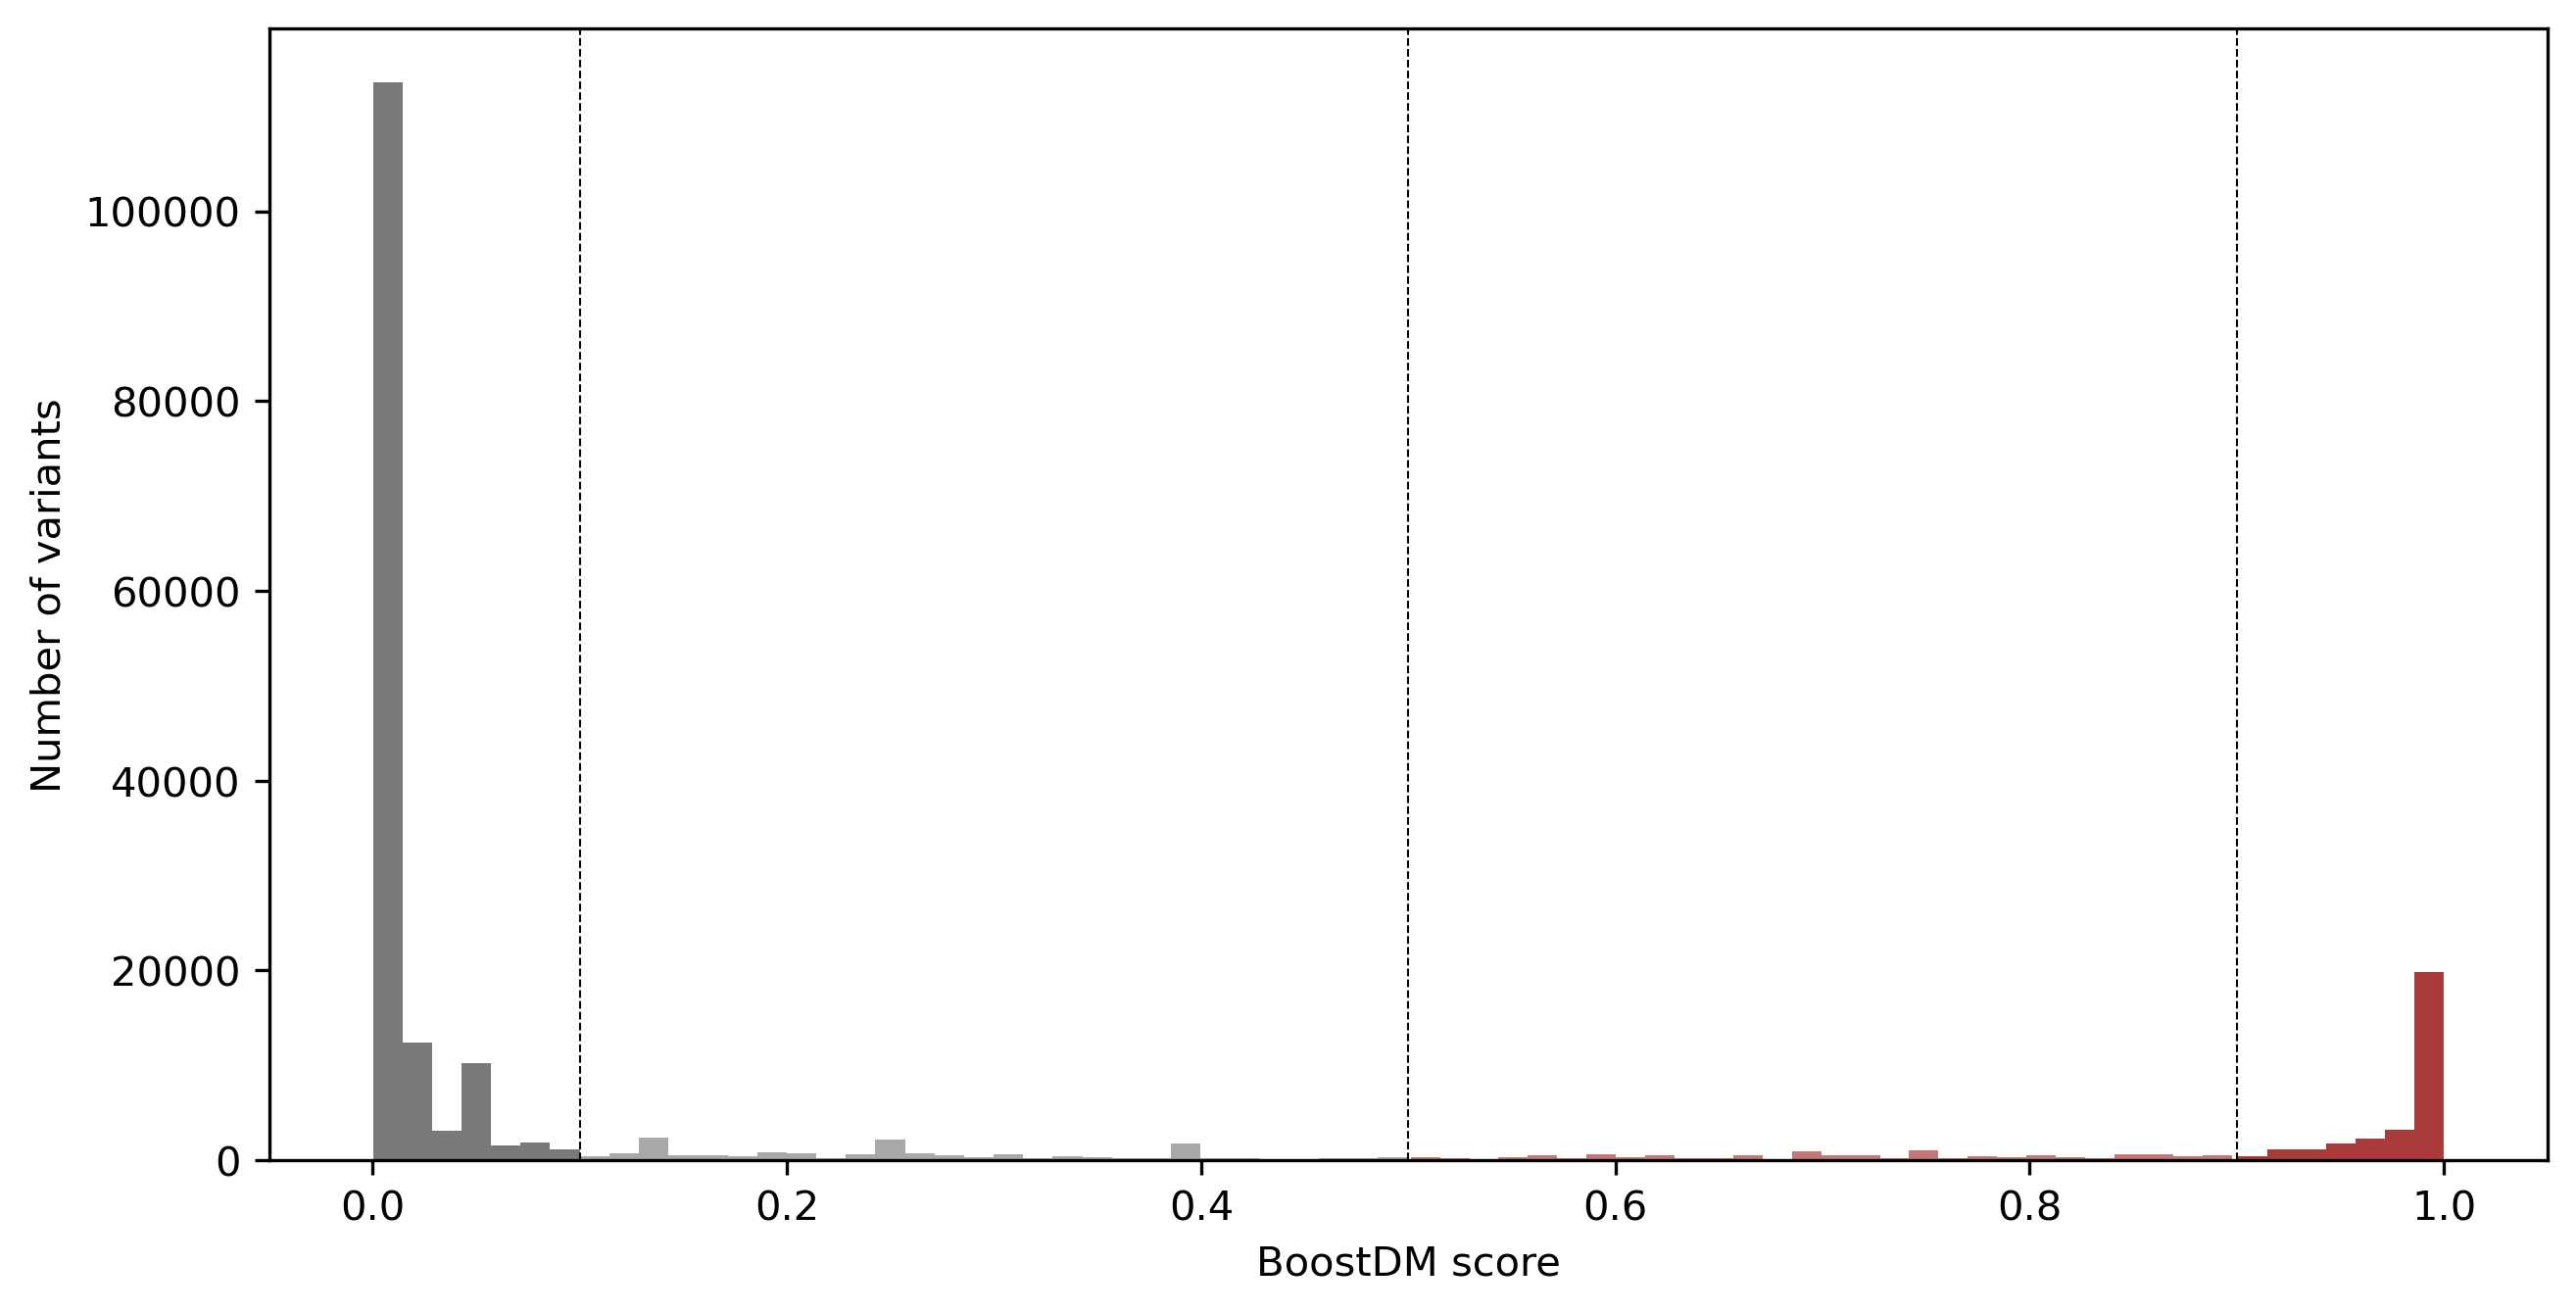

In [18]:
# Number of VAF variants per case
from matplotlib import pyplot

plt.figure(figsize=(10, 5))
for i in range(len(series)):
    pyplot.hist(series[i]['boostDM_score'],ranges[i], alpha=0.8, label=series_name[i], color=color[i])
    
pyplot.ylabel('Number of variants')
pyplot.xlabel('BoostDM score')
pyplot.legend(loc='upper right', fontsize = 10)

plt.axvline(x = 0.9, color = 'k', ls='--', lw=0.5)
plt.axvline(x = 0.5, color = 'k', ls='--', lw=0.5)
plt.axvline(x = 0.1, color = 'k', ls='--', lw=0.5)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend('',frameon=False)


In [19]:
series_name

['boostDM_scnondriver',
 'boostDM_scpossnondriver',
 'boostDM_scpossdriver',
 'boostDM_scdriver']

In [20]:
series_titles = {'boostDM_scnondriver': 'High-confidence non-driver',\
 'boostDM_scpossnondriver': 'Other non-driver',\
'boostDM_scpossdriver':'Other driver',\
 'boostDM_scdriver':'High-confidence driver'}


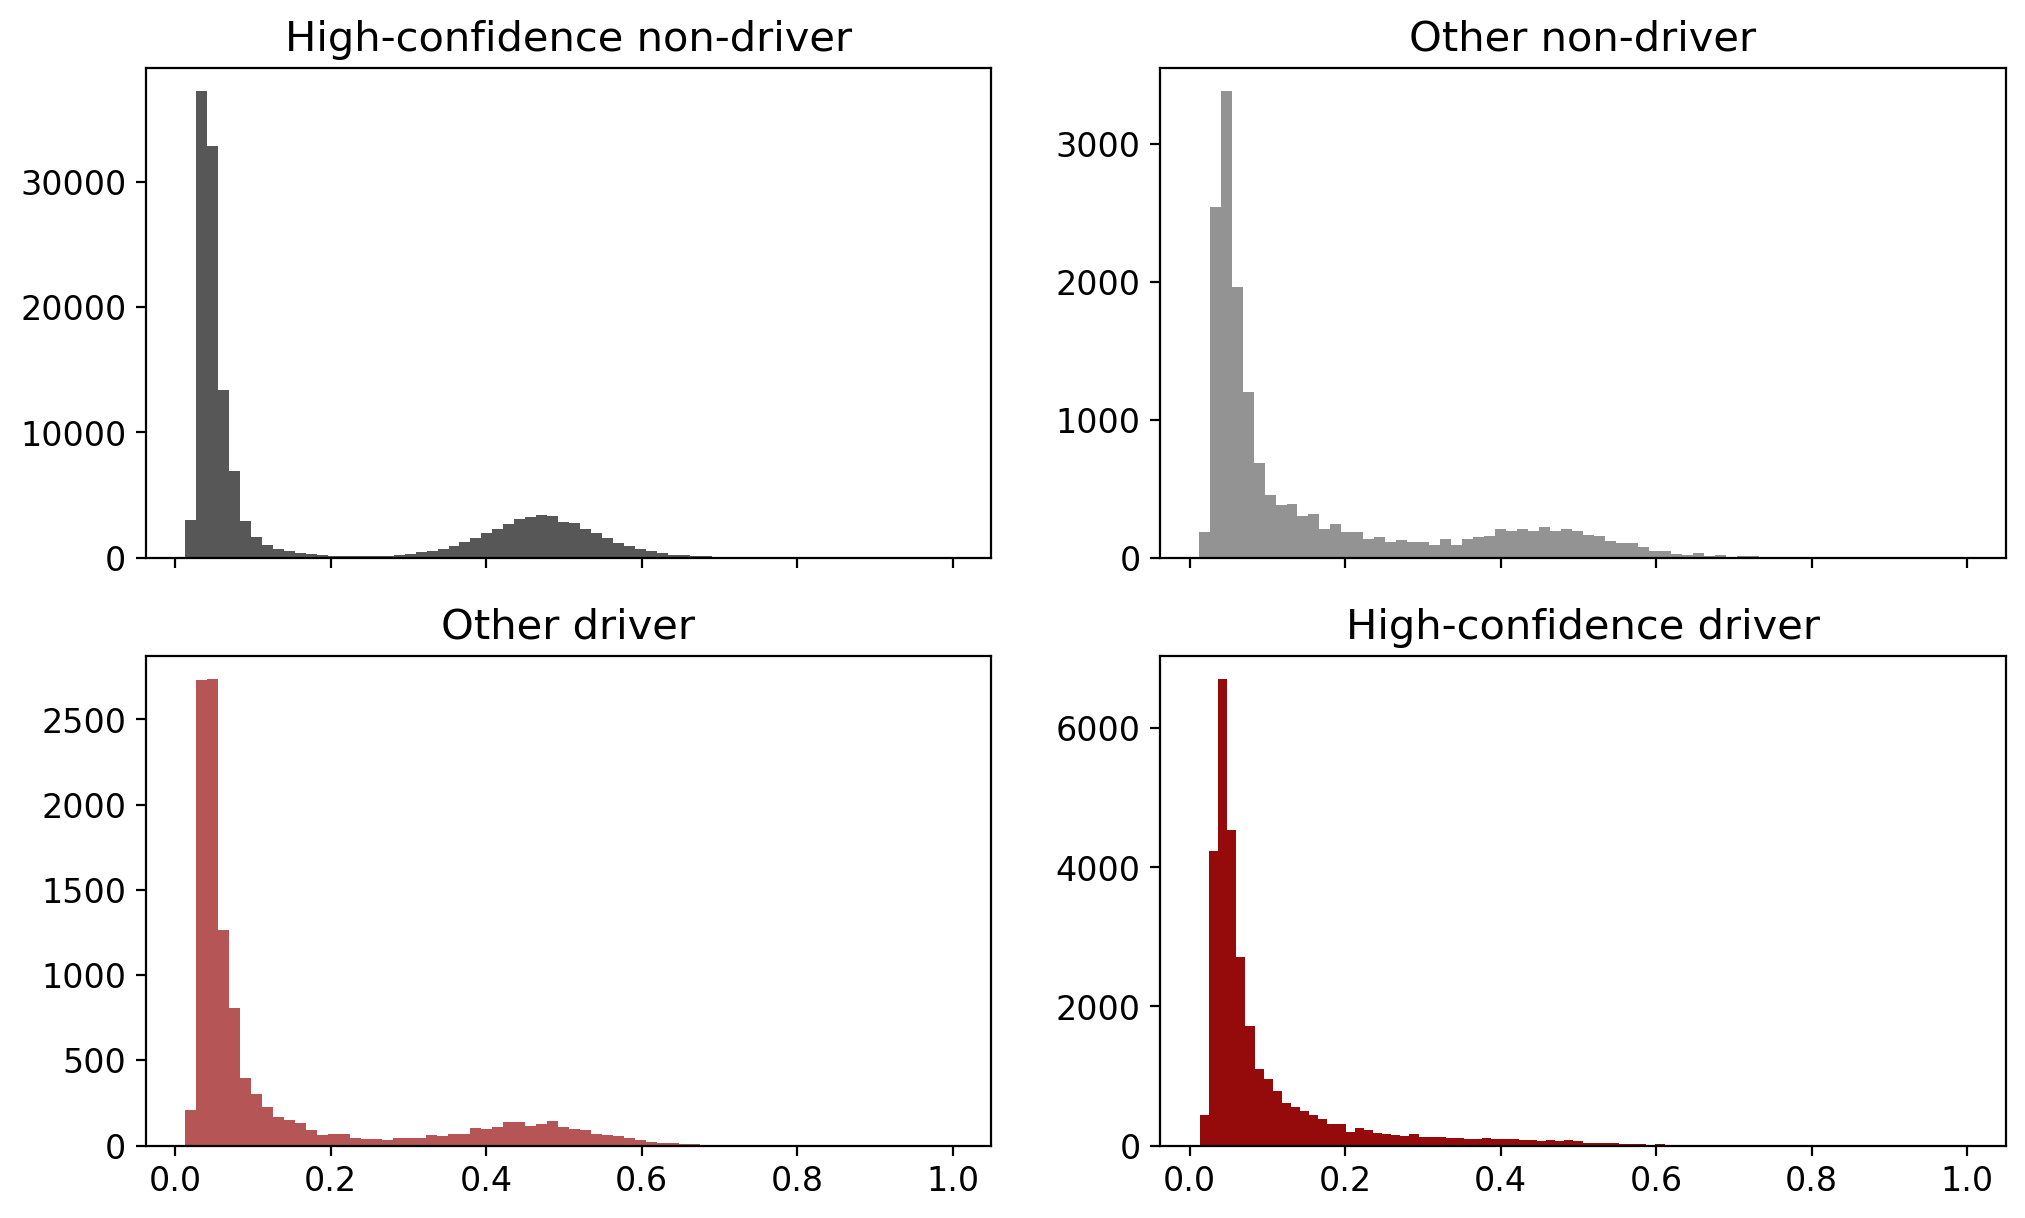

In [21]:
# Number of VAF variants per case
from matplotlib import pyplot
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(2, 2, figsize=(12, 7), dpi=200, sharex=True, sharey=False)
ax = ax.flatten()
for i, serie in enumerate(series):
    ax[i].hist(serie['VAF_alt'],70, alpha=1, label=series_name[i], color=color[i])
    # ax[i].set_yscale('log')
    ax[i].set_title(series_titles[series_name[i]], size=15)
    ax[i].tick_params(axis='both', which='both', labelsize=12)

### Annotate boostDM-score information per case

In [22]:
ukb200K_ch_cancer = ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0].reset_index(drop=True)
len(ukb200K_ch_cancer)

467202

In [23]:
for n, serie in enumerate(series):
    name = series_name[n]
    print(name)
    patients_CHdrivers = [int(i) for i in serie['patient'].to_list()]
    ukb200K_ch_cancer[name] = np.where(ukb200K_ch_cancer['patient'].isin(patients_CHdrivers), 1, 0)
    print('done')

boostDM_scnondriver
done
boostDM_scpossnondriver
done
boostDM_scpossdriver
done
boostDM_scdriver
done


### Overview of UKB mutations per boostDM-CH score group

In [24]:
Mut_case = []
for gene in boostDM_predictions['SYMBOL'].unique():
    freq_driv = len(boostDM_scdriver[(boostDM_scdriver['SYMBOL']==gene)])
    freq_posdriver = len(boostDM_scpossdriver[(boostDM_scpossdriver['SYMBOL']==gene)])
    freq_posnondriver = len(boostDM_scpossnondriver[(boostDM_scpossnondriver['SYMBOL']==gene)])
    freq_nondriver = len(boostDM_scnondriver[(boostDM_scnondriver['SYMBOL']==gene)])
    Mut_case.append([gene, freq_driv, freq_posdriver, freq_posnondriver, freq_nondriver])

In [25]:
Mut_case = pd.DataFrame(Mut_case, columns = ['Gene', 'Drivers', 'Pos_Driver', 'Pos_nonDriver', 'nonDrivers']).sort_values('Drivers', ascending=False)
Mut_case.reset_index()

,index,Gene,Drivers,Pos_Driver,Pos_nonDriver,nonDrivers
0,2,DNMT3A,14749,6798,2929,12566
1,1,TET2,7109,2715,2806,28247
2,3,ASXL1,2452,7,0,32927
3,5,TP53,1543,610,344,6157
4,7,CHEK2,1422,790,4655,4000
5,6,PPM1D,811,66,15,12914
6,0,SRSF2,524,47,497,4846
7,4,SF3B1,348,359,1225,7564
8,11,U2AF1,309,152,2127,2958
9,10,GNAS,239,12,1110,18395


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


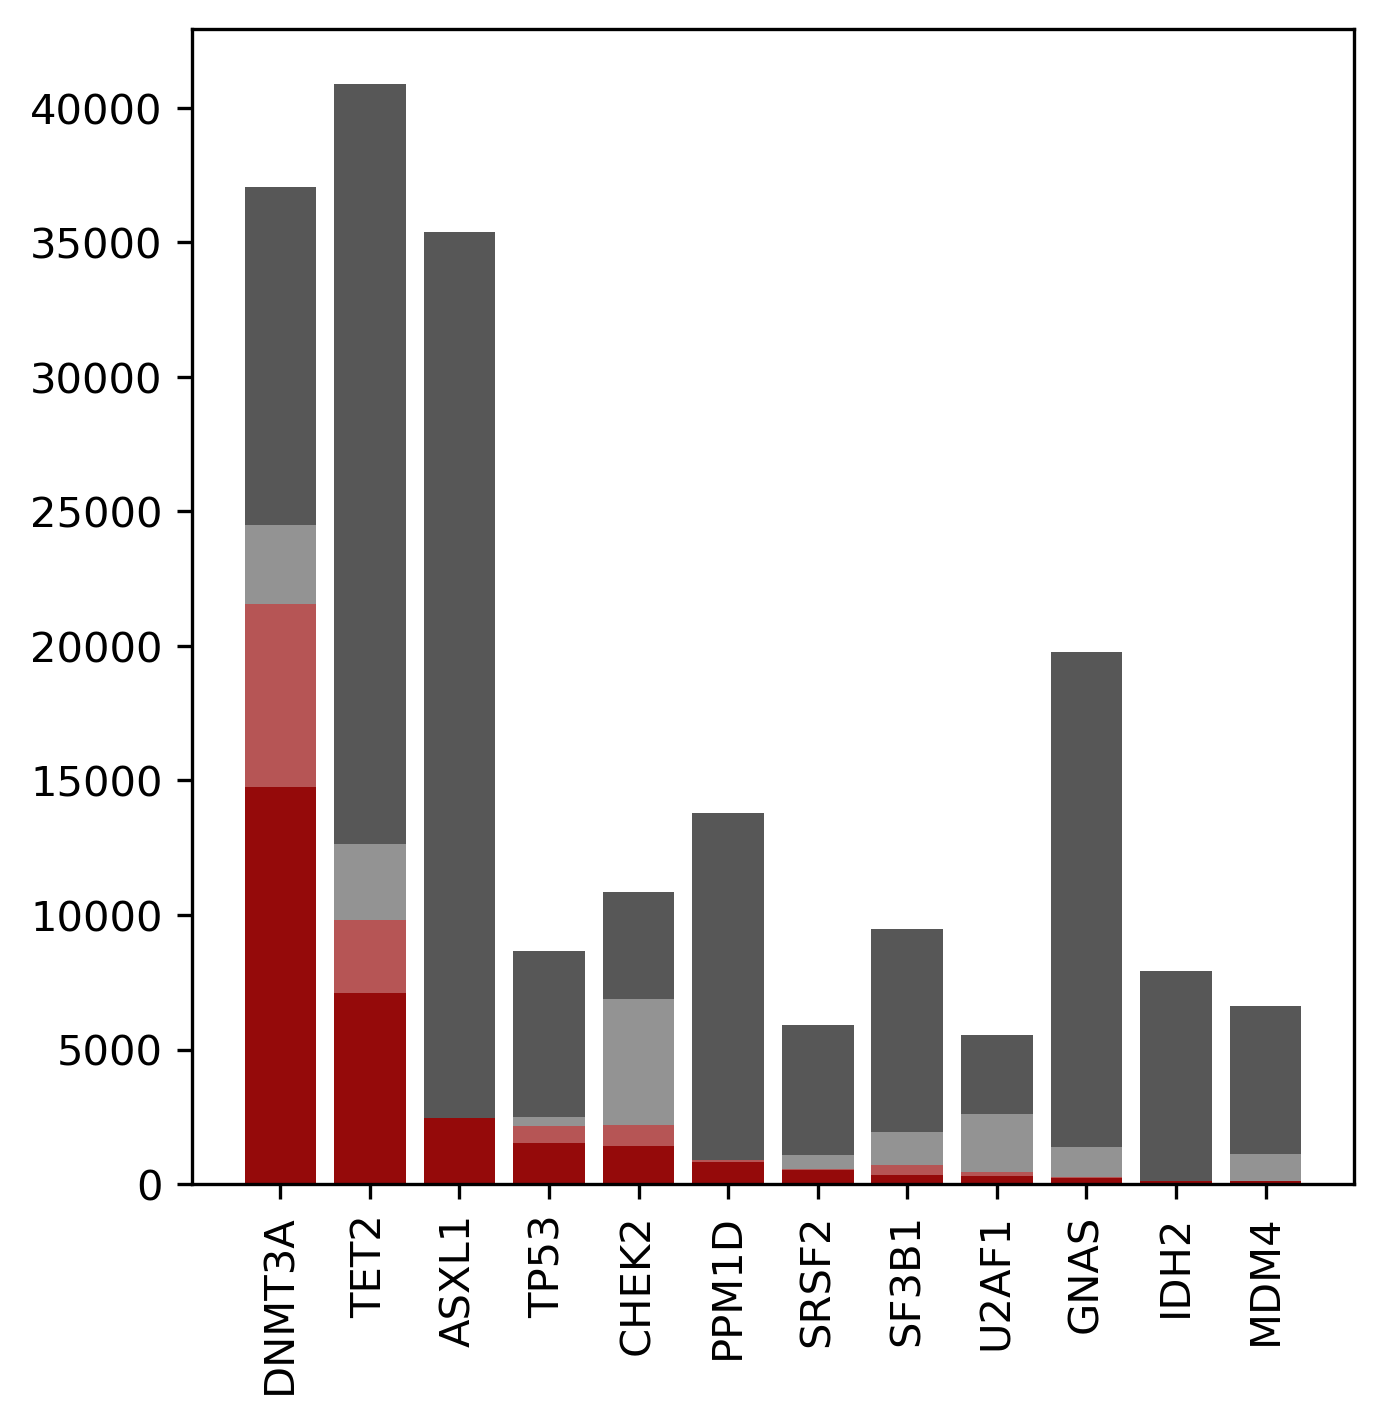

In [26]:
# importing package
import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5), dpi=300)
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
# create data
x = Mut_case['Gene']
y1 = Mut_case['Drivers']
y2 = Mut_case['Pos_Driver']
y3 = Mut_case['Pos_nonDriver']
y4 = Mut_case['nonDrivers']
 
# plot bars in stack manner
plt.bar(x, y1, color=color[3])
plt.bar(x, y2, bottom=y1, color=color[2])
plt.bar(x, y3, bottom=y1+y2, color=color[1])
plt.bar(x, y4, bottom=y1+y2+y3, color=color[0])
leg = ax.legend()
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.legend('',frameon=False)
plt.show()

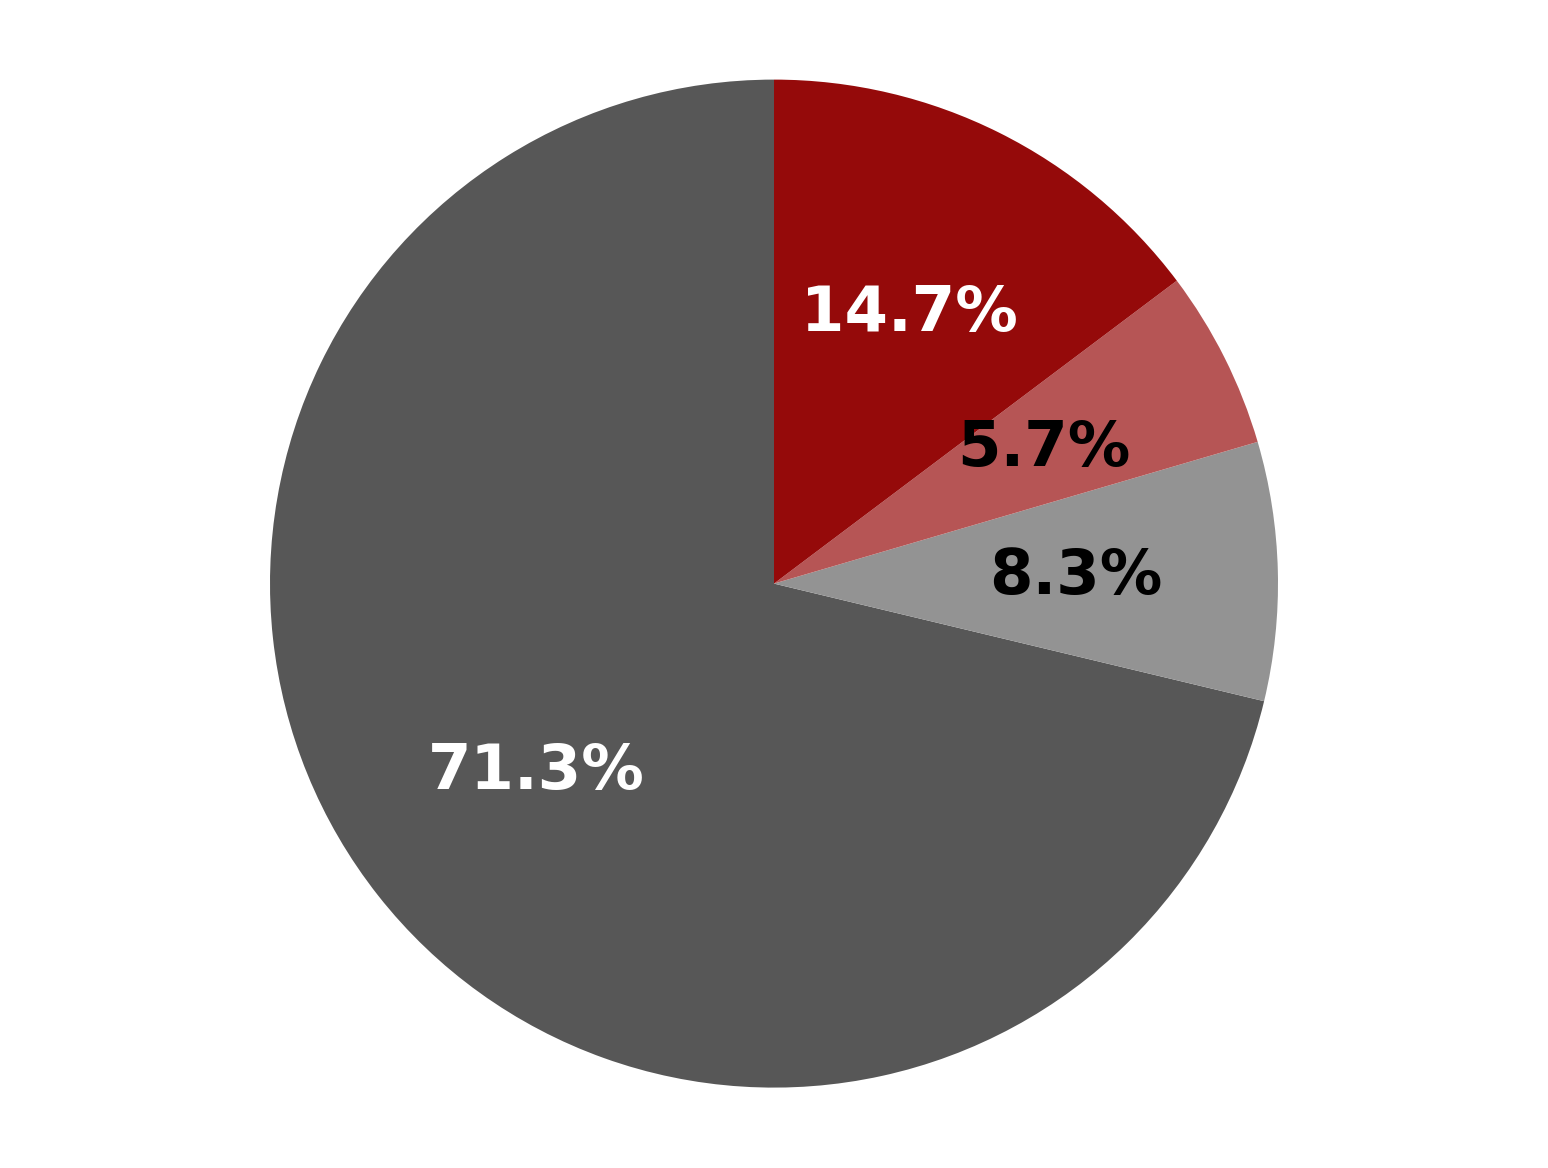

In [27]:
labels= series_name
colors=color
sizes= [sum(Mut_case['nonDrivers']), sum(Mut_case['Pos_nonDriver']), sum(Mut_case['Pos_Driver']), sum(Mut_case['Drivers'])]

_, _, autotexts  = plt.pie(sizes,labels=None, colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 15})

text_colors = ['white', 'k', 'k', 'white']

for text, colorss in zip(autotexts, text_colors):
    text.set_fontweight('bold')
    text.set_color(colorss)

plt.axis('equal')
plt.show()

### Age association plot

In [28]:
# Remove cases with prior hematological cancer
ukb200K_ch_canc = ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0]
len(ukb200K_ch_canc)

467202

In [29]:
series_name = ['boostDM_scnondriver', 'boostDM_scpossnondriver', 'boostDM_scpossdriver', 'boostDM_scdriver']
color = ['#575757', '#939393', '#B65555', '#950A0A']
color_score = dict(zip(series_name, color))
color_score

{'boostDM_scnondriver': '#575757',
 'boostDM_scpossnondriver': '#939393',
 'boostDM_scpossdriver': '#B65555',
 'boostDM_scdriver': '#950A0A'}

In [30]:
### Get number of patients per age group
agegroups_all_group = ukb200K_ch_canc.groupby('age_group_x').size()
agegroups_all_group

age_group_x
38-45     59967
46-50     62905
51-55     73374
56-60     91442
61-65    110951
66-72     68563
dtype: int64

In [31]:
age_groups = ['38-45', '46-50', '51-55', '56-60', '61-65', '66-72']; print(age_groups)
agegroups_all = [59967, 62905, 73374, 91442, 110951, 68563]; print(agegroups_all)
print(sum(agegroups_all))

### Get number of patients per age group
agegroups_all_group = ukb200K_ch_canc.groupby('age_group_x').size()
agegroups_all_group

def prop_CH_model(data, model, normalize=False, printprop=False):
    agegroup_set = data[data[model] == 1].groupby('age_group_x').size()

    merged = pd.merge(agegroup_set.to_frame(), agegroups_all_group.to_frame(),left_index=True, right_index=True)
    prop_CH = round(merged.apply(lambda x: x['0_x'] / x['0_y'] * 100, axis=1), 4)
    
    if normalize == True:
        prop_CH = prop_CH.apply(lambda x: x / prop_CH[0])
    if printprop == True:
        print(prop_CH)
    return prop_CH

['38-45', '46-50', '51-55', '56-60', '61-65', '66-72']
[59967, 62905, 73374, 91442, 110951, 68563]
467202


In [32]:
agegroup_set = ukb200K_ch_canc[ukb200K_ch_canc['boostDM_scdriver'] == 1].groupby('age_group_x').size()
merged = pd.merge(agegroup_set.to_frame(), agegroups_all_group.to_frame(),left_index=True, right_index=True)
merged
prop_CH = round(merged.apply(lambda x: x['0_x'] / x['0_y'] * 100, axis=1), 4)
prop_CH

age_group_x
38-45    3.0934
46-50    3.8423
51-55    4.5970
56-60    6.0246
61-65    7.5826
66-72    9.2455
dtype: float64

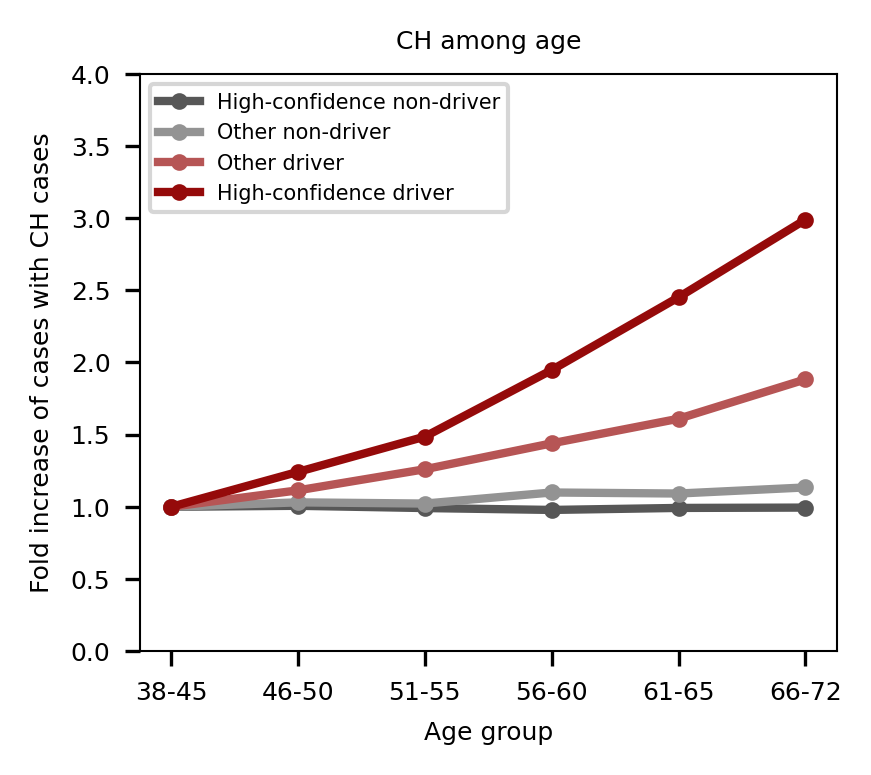

In [33]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 6})
plt.rcParams["figure.figsize"] = (3.5,2.5)
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(3,2.5), dpi=300)

for x in series_name:
    driver_AD = ukb200K_ch_canc[ukb200K_ch_canc[x]==1]
    agecorr_driver = prop_CH_model(driver_AD, x, normalize=True)
    plt.plot(agecorr_driver, '.-', linewidth=2, color=color_score[x])

#D62728, #990707, #EF6161

plt.title('CH among age', fontsize = 6)
plt.xlabel('Age group',size=6)
plt.ylabel('Fold increase of cases with CH cases', fontsize=6)
plt.ylim([0,4])
plt.xticks(np.arange(6), age_groups, size=6)
plt.legend(labels=['High-confidence non-driver','Other non-driver',
                   'Other driver','High-confidence driver'], loc='upper left', prop={'size': 5})
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0.5)  # change width


### Age logistic regression

In [34]:
series_name

['boostDM_scnondriver',
 'boostDM_scpossnondriver',
 'boostDM_scpossdriver',
 'boostDM_scdriver']

In [35]:
def series_matrix(mat, gene):
    if gene == 'boostDM_scnondriver':
        matrix = mat[(mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scpossnondriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scpossdriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scdriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0)]
    return matrix

In [36]:
#Remove cases with prior hemathological cancer
ukb200K_ch_cancer_logistic = ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0]

In [37]:
#perform logistic regression separetly
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as mtc

name = []
OR = []
cilow = []
ciup = []
rsquare = []
pval = []
sig = []
    
for gene in series_name:  
   
    #drivers
    CH_driver_matrix = series_matrix(ukb200K_ch_cancer_logistic, gene)
    model_hematopost = smf.logit(formula= gene+' ~ 1 + age_recruitment_x + sex + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data=CH_driver_matrix).fit()
    
    name.append(gene)
    OR.append(np.exp(model_hematopost.params[1]))
    cilow.append(np.exp(model_hematopost.conf_int().iloc[1,0]))
    ciup.append(np.exp(model_hematopost.conf_int().iloc[1,1]))
    rsquare.append(model_hematopost.prsquared)
    pval.append(model_hematopost.pvalues[1])
    sig.append('significant' if model_hematopost.pvalues[1] <= 0.05 else 'not significant')

varlist = pd.DataFrame(list(zip(name, OR, cilow, ciup, pval, rsquare)), columns = ['gene','OR', 'Lower CI', 'Upper CI', 'pval', 'rsquare'])
varlist["q_value"] = mtc.fdrcorrection(pd.to_numeric(varlist['pval']))[1]
varlist['sig'] = ['sig' if qval <= 0.05 else 'ns' for qval in varlist.q_value]
varlist

Optimization terminated successfully.
         Current function value: 0.539335
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.132297
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.103743
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208157
         Iterations 7


,gene,OR,Lower CI,Upper CI,pval,rsquare,q_value,sig
0,boostDM_scnondriver,1.001172,1.000270,1.002075,1.087425e-02,0.002881,1.087425e-02,sig
1,boostDM_scpossnondriver,1.005151,1.002598,1.007711,7.500783e-05,0.001362,1.000104e-04,sig
2,boostDM_scpossdriver,1.028369,1.025212,1.031535,3.680959e-71,0.006409,7.361918e-71,sig
3,boostDM_scdriver,1.053166,1.051014,1.055322,0.000000e+00,0.018962,0.000000e+00,sig


In [38]:
Dic_sc = {
    'boostDM_scnondriver':'High-confidence non-driver',
    'boostDM_scpossnondriver':'Other non-driver',
    'boostDM_scpossdriver':'Other driver',
    'boostDM_scdriver':'High-confidence driver',
}

/tmp/jobs/jramis/9874679/ipykernel_54315/2673291874.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


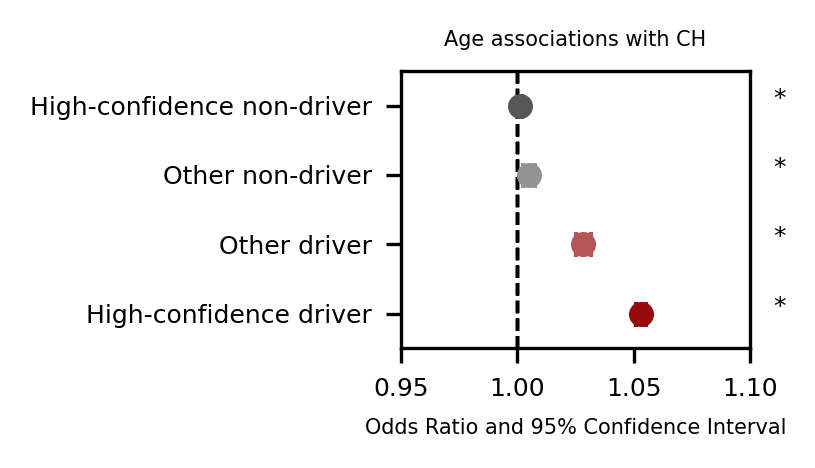

In [39]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(1.5, 1.2))
xlimit = 1.1
ylimit = len(varlist)-1

for idx, row in varlist.iloc[::-1].iterrows():
    ci = [[row['OR'] - row['Lower CI']], [row['Upper CI'] - row['OR']]]
    plt.errorbar(x=[row['OR']], y=[Dic_sc[row.gene]], xerr=ci,
                     ecolor=color_score[row.gene], capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc=color_score[row.gene], mec=color_score[row.gene])
    plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
        
    if row['sig'] == 'sig':
        ax.text(xlimit+0.01, ylimit-idx, '*', style='italic', size=6)
    else:
        ax.text(xlimit+0.01, ylimit-idx, 'ns', style='italic', size=6)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=5)
ax.set_title('Age associations with CH', fontdict={'size':5})
plt.tight_layout()
plt.xlim([0.95, xlimit])
ax.set_ylim(-.5, ylimit+.5)
plt.show()

### Hematological cancer associations

In [40]:
#perform logistic regression separetly
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as mtc

name = []
OR = []
cilow = []
ciup = []
rsquare = []
pval = []
sig = []
    
for gene in series_name:  
   
    #drivers
    CH_driver_matrix = series_matrix(ukb200K_ch_cancer_logistic, gene)
    model_hematopost = smf.logit(formula= 'var_HNALL_post ~ 1 + '+gene+' + age_recruitment_x + sex + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data=CH_driver_matrix).fit()
    
    name.append(gene)
    OR.append(np.exp(model_hematopost.params[1]))
    cilow.append(np.exp(model_hematopost.conf_int().iloc[1,0]))
    ciup.append(np.exp(model_hematopost.conf_int().iloc[1,1]))
    rsquare.append(model_hematopost.prsquared)
    pval.append(model_hematopost.pvalues[1])
    sig.append('significant' if model_hematopost.pvalues[1] <= 0.05 else 'not significant')    
    
varlist = pd.DataFrame(list(zip(name, OR, cilow, ciup, pval, rsquare)), columns = ['gene','OR', 'Lower CI', 'Upper CI', 'pval', 'rsquare'])
varlist["q_value"] = mtc.fdrcorrection(pd.to_numeric(varlist['pval']))[1]
varlist['sig'] = ['sig' if qval <= 0.05 else 'ns' for qval in varlist.q_value]
varlist

Optimization terminated successfully.
         Current function value: 0.055179
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.054965
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.055166
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.058535
         Iterations 9


,gene,OR,Lower CI,Upper CI,pval,rsquare,q_value,sig
0,boostDM_scnondriver,1.049756,0.977616,1.127220,1.813019e-01,0.029748,1.813019e-01,ns
1,boostDM_scpossnondriver,1.178121,0.978161,1.418958,8.411494e-02,0.029370,1.121533e-01,ns
2,boostDM_scpossdriver,1.378378,1.135580,1.673090,1.170204e-03,0.029965,2.340408e-03,sig
3,boostDM_scdriver,2.362706,2.149605,2.596932,4.259701e-71,0.038404,1.703880e-70,sig


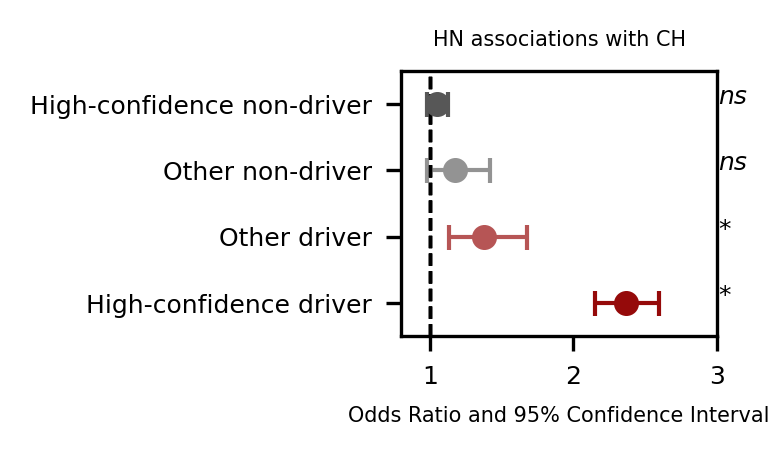

In [41]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(3, 1.5))
xlimit = 3
ylimit = len(varlist)-1

for idx, row in varlist.iloc[::-1].iterrows():
    ci = [[row['OR'] - row['Lower CI']], [row['Upper CI'] - row['OR']]]
    plt.errorbar(x=[row['OR']], y=[Dic_sc[row.gene]], xerr=ci,
                     ecolor=color_score[row.gene], capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc=color_score[row.gene], mec=color_score[row.gene])
    plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
        
    if row['sig'] == 'sig':
        ax.text(xlimit+0.01, ylimit-idx, '*', style='italic', size=6)
    else:
        ax.text(xlimit+0.01, ylimit-idx, 'ns', style='italic', size=6)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=5)
ax.set_title('HN associations with CH', fontdict={'size':5})
plt.tight_layout()
plt.xlim([0.80, xlimit])
ax.set_ylim(-.5, ylimit+.5)
plt.show()

### Myeloid cancer associations

In [42]:
#perform logistic regression separetly
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as mtc

name = []
OR = []
cilow = []
ciup = []
rsquare = []
pval = []
sig = []
    
for gene in series_name:  
   
    #drivers
    CH_driver_matrix = series_matrix(ukb200K_ch_cancer_logistic, gene)
    model_hematopost = smf.logit(formula= 'var_MM_post ~ 1 + '+gene+' + age_recruitment_x + sex + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data=CH_driver_matrix).fit()
    
    name.append(gene)
    OR.append(np.exp(model_hematopost.params[1]))
    cilow.append(np.exp(model_hematopost.conf_int().iloc[1,0]))
    ciup.append(np.exp(model_hematopost.conf_int().iloc[1,1]))
    rsquare.append(model_hematopost.prsquared)
    pval.append(model_hematopost.pvalues[1])
    sig.append('significant' if model_hematopost.pvalues[1] <= 0.05 else 'not significant')    
    
varlist = pd.DataFrame(list(zip(name, OR, cilow, ciup, pval, rsquare)), columns = ['gene','OR', 'Lower CI', 'Upper CI', 'pval', 'rsquare'])
varlist["q_value"] = mtc.fdrcorrection(pd.to_numeric(varlist['pval']))[1]
varlist['sig'] = ['sig' if qval <= 0.05 else 'ns' for qval in varlist.q_value]
varlist

Optimization terminated successfully.
         Current function value: 0.013585
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.013394
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.013519
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.016755
         Iterations 11


,gene,OR,Lower CI,Upper CI,pval,rsquare,q_value,sig
0,boostDM_scnondriver,1.129172,0.961840,1.325615,1.376692e-01,0.022015,1.376692e-01,ns
1,boostDM_scpossnondriver,1.366013,0.914798,2.039784,1.273462e-01,0.021298,1.376692e-01,ns
2,boostDM_scpossdriver,1.934261,1.322311,2.829414,6.747197e-04,0.022953,1.349439e-03,sig
3,boostDM_scdriver,6.920799,5.992023,7.993537,1.398647e-152,0.071960,5.594588e-152,sig


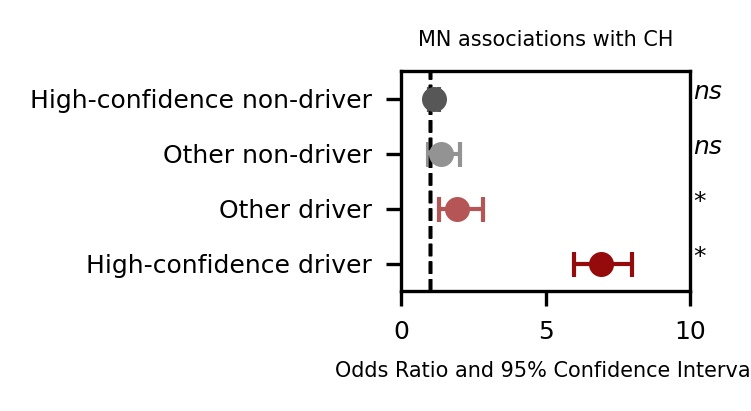

In [43]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(3, 1.35))
xlimit = 10
ylimit = len(varlist)-1

for idx, row in varlist.iloc[::-1].iterrows():
    ci = [[row['OR'] - row['Lower CI']], [row['Upper CI'] - row['OR']]]
    plt.errorbar(x=[row['OR']], y=[Dic_sc[row.gene]], xerr=ci,
                     ecolor=color_score[row.gene], capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc=color_score[row.gene], mec=color_score[row.gene])
    plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
        
    if row['sig'] == 'sig':
        ax.text(xlimit+0.1, ylimit-idx, '*', style='italic', size=6)
    else:
        ax.text(xlimit+0.1, ylimit-idx, 'ns', style='italic', size=6)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=5)
ax.set_title('MN associations with CH', fontdict={'size':5})
plt.tight_layout()
plt.xlim([0, xlimit])
ax.set_ylim(-.5, ylimit+.5)
plt.show()

### Age associations per genes

In [44]:
genes12 = [ 'DNMT3A', 'TET2', 'ASXL1', 'CHEK2', 'TP53', 'PPM1D', 'SF3B1', 'SRSF2', 'U2AF1', 'GNAS', 'IDH2', 'MDM4']

In [45]:
def gene_matrix(mat, gene):
    if gene == 'ASXL1':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'CHEK2':
        matri = mat[(mat['ASXL1_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'DNMT3A':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'GNAS':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'IDH2':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'MDM4':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'PPM1D':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'SF3B1':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'SRSF2':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'TET2':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'TP53':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['ASXL1_potential']==0) &\
                 (mat['U2AF1_potential']==0)]
    elif gene == 'U2AF1':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['ASXL1_potential']==0)]
    elif gene == 'DDR':
        matri = mat[(mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['U2AF1_potential']==0) &\
                 (mat['ASXL1_potential']==0)]
    elif gene == 'splicing':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['DNMT3A_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['TET2_potential']==0) &\
                 (mat['TP53_potential']==0) &\
                 (mat['ASXL1_potential']==0)]
    elif gene == 'chromatin':
        matri = mat[(mat['CHEK2_potential']==0) &\
                 (mat['U2AF1_potential']==0) &\
                 (mat['GNAS_potential']==0) &\
                 (mat['IDH2_potential']==0) &\
                 (mat['MDM4_potential']==0) &\
                 (mat['PPM1D_potential']==0) &\
                 (mat['SF3B1_potential']==0) &\
                 (mat['SRSF2_potential']==0) &\
                 (mat['TP53_potential']==0)]
    return(matri)

In [46]:
def series_matrix(mat, gene):
    if gene == 'boostDM_scnondriver':
        matrix = mat[(mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scpossnondriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scpossdriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scdriver']==0)]
    elif gene == 'boostDM_scdriver':
        matrix = mat[(mat['boostDM_scnondriver']==0) &\
                 (mat['boostDM_scpossnondriver']==0) &\
                 (mat['boostDM_scpossdriver']==0)]
    return matrix

In [47]:
ukb200K_ch_cancer_logistic = ukb200K_ch_cancer[ukb200K_ch_cancer['var_HNALL_pre']==0]
len(ukb200K_ch_cancer_logistic)

467202

In [48]:
ukb200K_ch_cancer_logistic[(ukb200K_ch_cancer_logistic['boostDM_scpossdriver']==1)&(ukb200K_ch_cancer_logistic['IDH2_potential']==1)]
CH_gene_matrix = gene_matrix(ukb200K_ch_cancer_logistic, 'IDH2')
a = series_matrix(CH_gene_matrix, 'boostDM_scpossdriver')
a[a['boostDM_scdriver']==1]
f = []
f.append(np.nan)
f.append(np.nan)
f.append(np.nan)
f

[nan, nan, nan]

In [49]:
series_color = {'boostDM_scnondriver': '#575757',
                'boostDM_scpossnondriver': '#939393',
                'boostDM_scpossdriver': '#B65555',
                'boostDM_scdriver':'#950A0A'}

boostDM_scdriver_boostDM_scpossnondriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossdriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossnondriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossdriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossnondriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossdriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>
boostDM_scdriver_boostDM_scpossdriver An exception of type type occurred. Arguments:
<attribute 'args' of 'BaseException' objects>


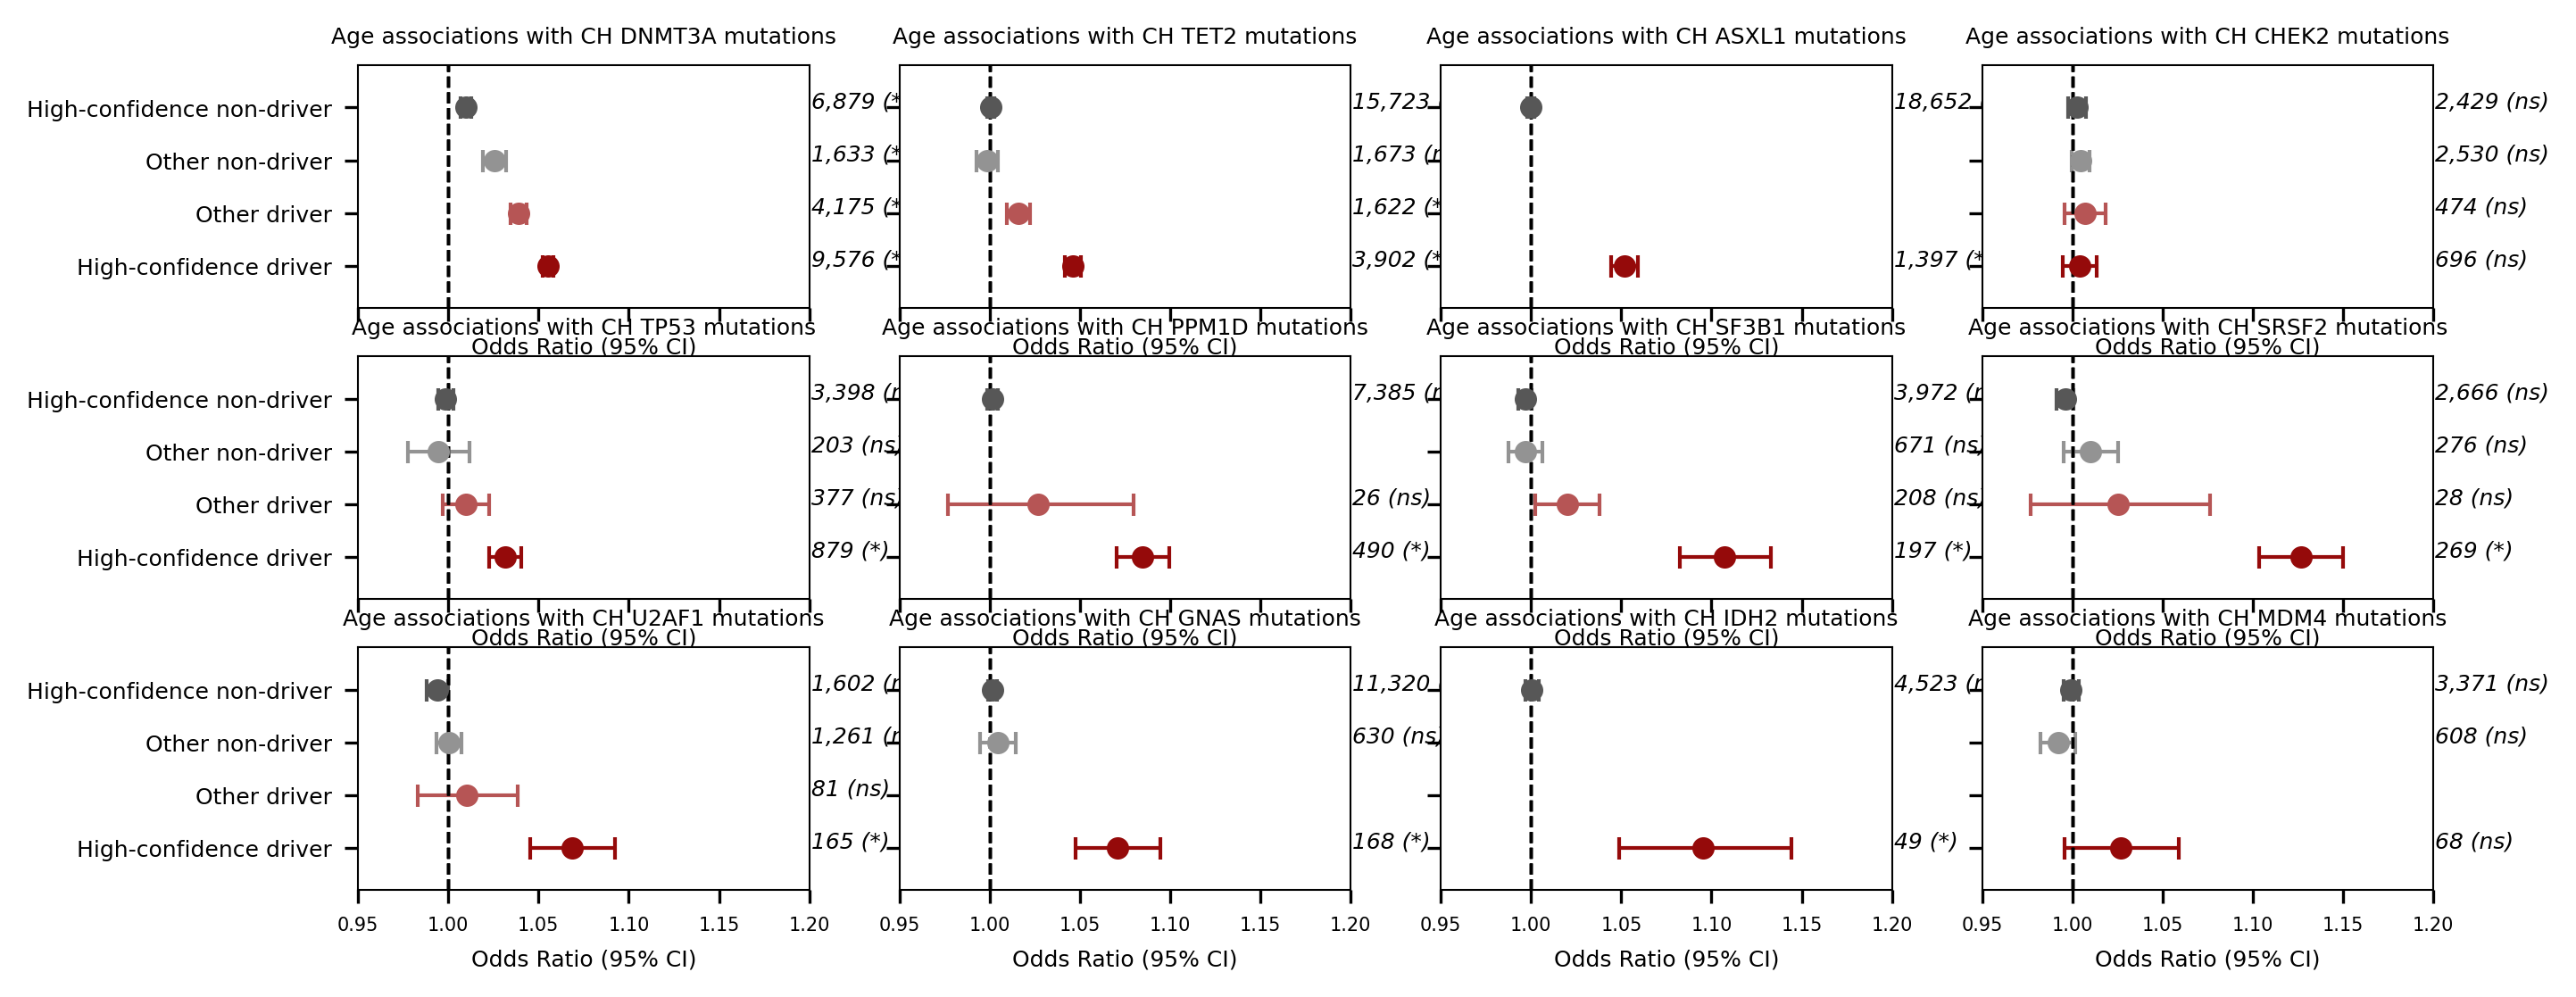

In [53]:
#perform logistic regression separetly
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as mtc
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', RuntimeWarning)

import matplotlib.pyplot as plt

# Number of rows and columns for subplots
nrows = 3
ncols = 4

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4), dpi=300, sharex=True, sharey=True)

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Loop over genes12 and create a subplot for each gene
for i, ggg in enumerate(genes12):
    name = []
    OR = []
    cilow = []
    ciup = []
    rsquare = []
    pval = []
    sig = []
    num_muts = []

    ax = axes[i]  # Select the current subplot

    CH_gene_matrix = gene_matrix(ukb200K_ch_cancer_logistic, ggg)
    for score in series_name:  
#         print(gene, score)
        CH_driver_matrix_sc = series_matrix(CH_gene_matrix, score)
        num_mut = len(CH_driver_matrix_sc[(CH_driver_matrix_sc[score] == 1)])

        if num_mut > 8: 
            model_hematopost = smf.logit(formula= score+' ~ 1 + age_recruitment_x + sex + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data=CH_driver_matrix_sc).fit(disp=False)
            name.append(gene+'-'+score)
            OR.append(np.exp(model_hematopost.params[1]))
            cilow.append(np.exp(model_hematopost.conf_int().iloc[1,0]))
            ciup.append(np.exp(model_hematopost.conf_int().iloc[1,1]))
            rsquare.append(model_hematopost.prsquared)
            pval.append(model_hematopost.pvalues[1])
            sig.append('significant' if model_hematopost.pvalues[1] <= 0.05 else 'not significant')
            num_muts.append(num_mut)

        
        else:
            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
            message = template.format(type(Exception).__name__, Exception.args)
            name.append(gene+'-'+score)
            OR.append(np.nan)
            cilow.append(np.nan)
            ciup.append(np.nan)
            rsquare.append(np.nan)
            pval.append(np.nan)
            sig.append('significant' if model_hematopost.pvalues[1] <= 0.05 else 'not significant')
            num_muts.append(np.nan)
            print(gene+'_'+score, message)

    varlist = pd.DataFrame(list(zip(name, num_muts, OR, cilow, ciup, pval, rsquare)), columns = ['gene','num_muts', 'OR', 'Lower CI', 'Upper CI', 'pval', 'rsquare'])
    
    import math
    q_value = []
    q_val = mtc.fdrcorrection(pd.to_numeric(varlist[~varlist['pval'].isna()]['pval']))[1]
    num_pval = -1
    for x in varlist.pval:
        if math.isnan(x):
            q_value.append(np.nan)
        else:
            num_pval=num_pval+1
            q_value.append(q_val[num_pval])
    varlist["q_value"] = q_value
    varlist['sig'] = ['sig' if qval <= 0.05 else 'ns' if qval > 0.05 else np.nan for qval in varlist.q_value]
    
    # Start plot
    xlimit = 1.2
    ylimit = len(varlist)-1

    for idx, row in varlist.iloc[::-1].iterrows():
        ci = [[row['OR'] - row['Lower CI']], [row['Upper CI'] - row['OR']]]
        ax.errorbar(x=[row['OR']], y=[Dic_sc[row.gene.split('-')[-1]]], xerr=ci,
                         ecolor=color_score[row.gene.split('-')[-1]], capsize=3, linestyle='None', linewidth=1, marker="o", 
                         markersize=5, mfc=color_score[row.gene.split('-')[-1]], mec=color_score[row.gene.split('-')[-1]])
        ax.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
        
        if row['sig'] == 'sig':
            ax.text(xlimit+0.001, ylimit-idx, f"{int(row['num_muts']):,} (*)", style='italic', size=6)
        elif row['sig'] == 'ns':
            ax.text(xlimit+0.001, ylimit-idx, f"{int(row['num_muts']):,} (ns)", style='italic', size=6)

    ax.set_title('Age associations with CH ' + ggg + ' mutations', fontdict={'size': 6})
    ax.set_xlim([0.95, xlimit])
    ax.set_ylim(-0.8, ylimit + 0.8)
    ax.tick_params(axis='y', labelsize=6)
    ax.tick_params(axis='x', labelsize=5)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)  # change width
    ax.set_xlabel('Odds Ratio (95% CI)', fontsize=6)

# plt.tight_layout()
plt.show()